In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/group/pmc026/nchoong/QuantumTransformer'

In [2]:
import glob

group_dir = os.getenv("MYGROUP")
glob.glob(f"{group_dir}/QuantumTransformer/data/word_embeddings/imdb_train_batch_*.pt")

['/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_0.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_1.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_2.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_3.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_4.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_5.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_6.pt']

In [3]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.load_dataloader import load_dataloader
from transformer.pytorch.utils.plots import plot_metrics

2024-09-29 16:45:28.239996: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 16:45:28.254200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 16:45:28.270592: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 16:45:28.275599: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 16:45:28.288640: I tensorflow/core/platform/cpu_feature_guar

In [4]:
from config import dev

dev

device(type='cuda')

In [5]:
import random
import numpy as np
import torch
import tensorflow as tf
import pennylane.ops as qmlops

In [6]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [7]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader("imdb")

Loading train tensors: 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


Sample size:  5000


Loading test tensors: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]


Test size:  5000
Sampled train tensor shape:  torch.Size([20000, 128, 768])
Sampled val tensor shape:  torch.Size([5000, 128, 768])
Sampled test tensor shape:  torch.Size([5000, 128, 768])
Train, Val, Test size:  20000 5000 5000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  2515
neg:  2485


In [8]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "encoder": "angle",
        "angle_rot": "X",
        "entangler": "strong",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 7,249 trainable parameters


Epoch   5/5: 100%|██████████| 313/313 [20:47<00:00,  3.98s/batch, Epoch = 20m 47s, Loss = 0.4585|0.4569, Acc = 0.799|0.794, AUC = 86.531|87.676]

TOTAL TIME = 6241.33s
BEST ACC = 0.79% AT EPOCH 5
BEST AUC = 87.68 AT EPOCH 5


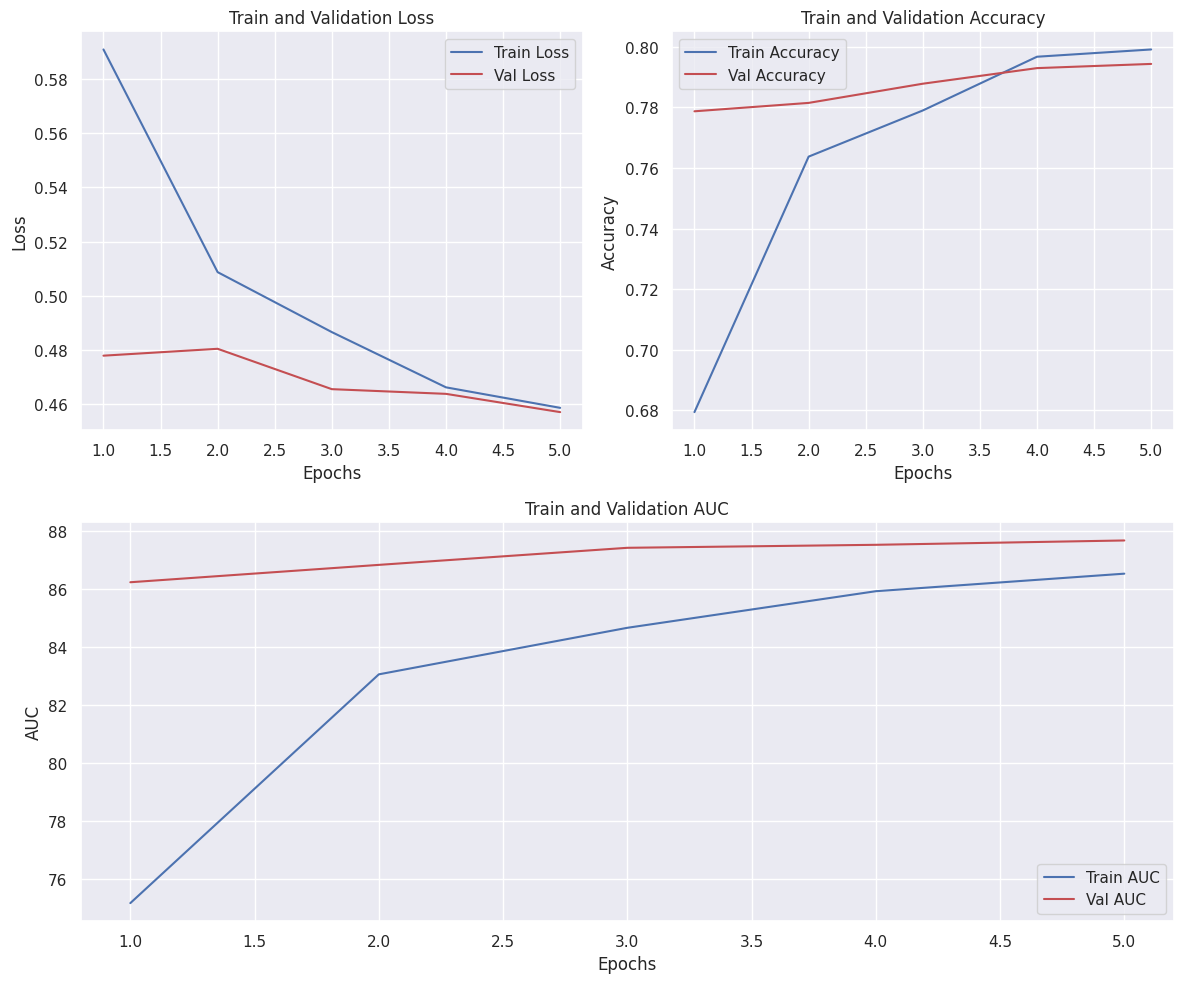

In [9]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [10]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "encoder": "angle",
        "angle_rot": "Y",
        "entangler": "strong",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 7,249 trainable parameters


Epoch   5/5: 100%|██████████| 313/313 [11:57<00:00,  2.29s/batch, Epoch = 11m 57s, Loss = 0.4523|0.4581, Acc = 0.798|0.792, AUC = 87.138|88.322]

TOTAL TIME = 5579.82s
BEST ACC = 0.79% AT EPOCH 4
BEST AUC = 88.32 AT EPOCH 5


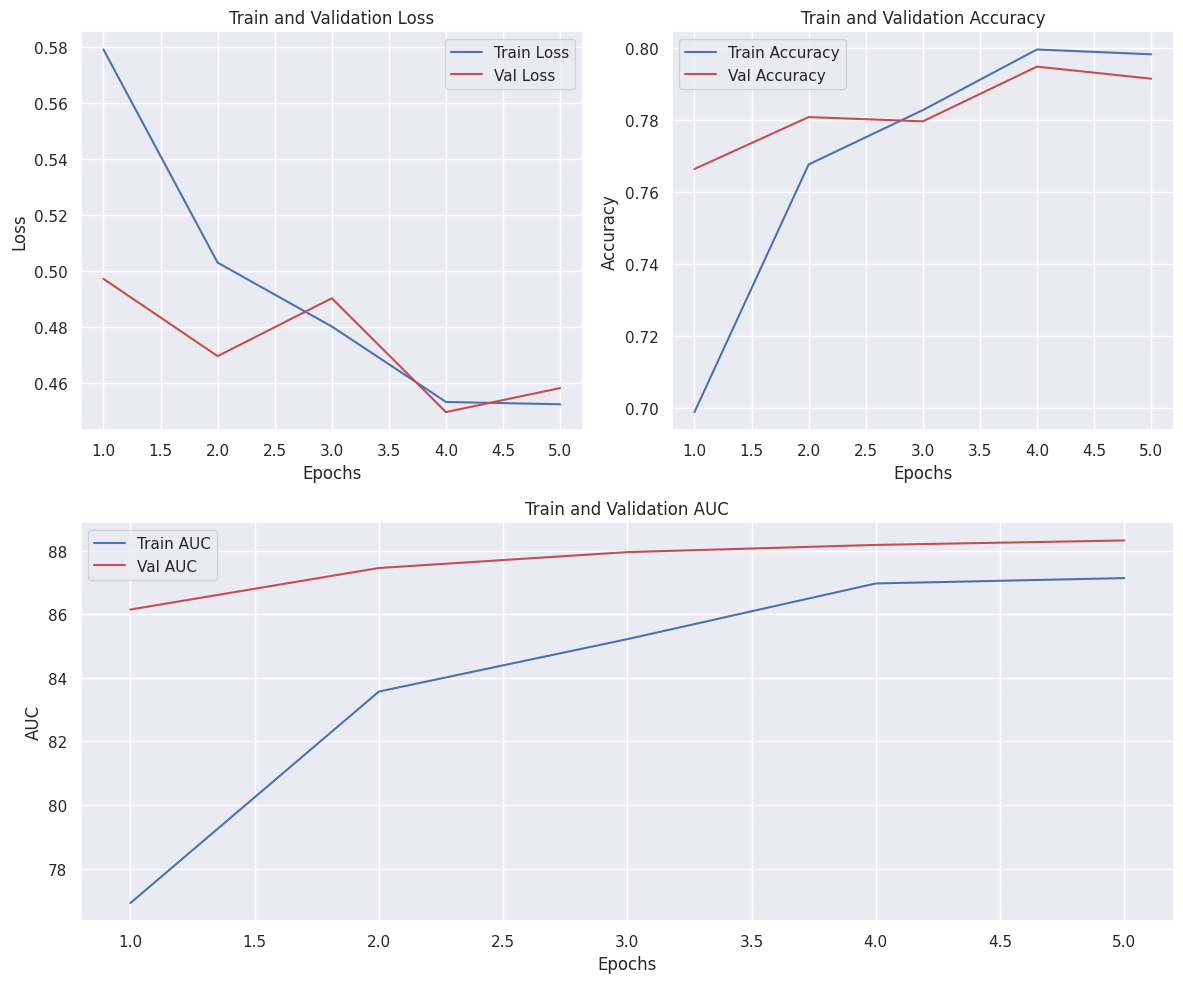

In [11]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [12]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "strong",
        "imprimitive": "X",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 7,249 trainable parameters


Epoch   5/5: 100%|██████████| 313/313 [08:58<00:00,  1.72s/batch, Epoch = 8m 58s, Loss = 0.4642|0.4684, Acc = 0.794|0.785, AUC = 86.236|87.193]

TOTAL TIME = 2717.78s
BEST ACC = 0.78% AT EPOCH 5
BEST AUC = 87.25 AT EPOCH 4


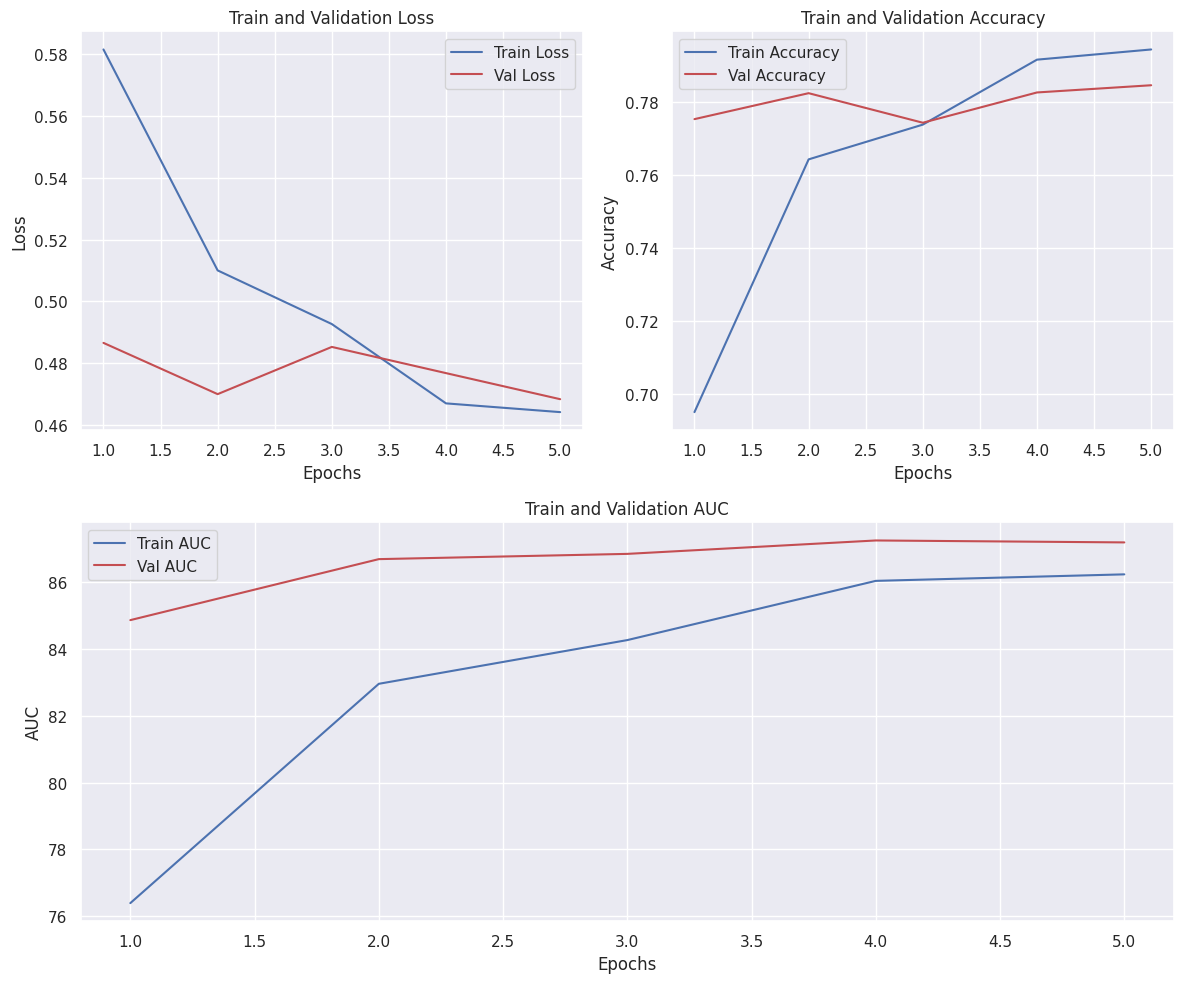

In [13]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [14]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "encoder": "angle",
        "angle_rot": "X",
        "entangler": "strong",
        "imprimitive": "Y",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 7,249 trainable parameters


Epoch   5/5: 100%|██████████| 313/313 [06:49<00:00,  1.31s/batch, Epoch = 6m 49s, Loss = 0.4504|0.4472, Acc = 0.803|0.795, AUC = 87.084|88.200]

TOTAL TIME = 2013.48s
BEST ACC = 0.80% AT EPOCH 4
BEST AUC = 88.20 AT EPOCH 5


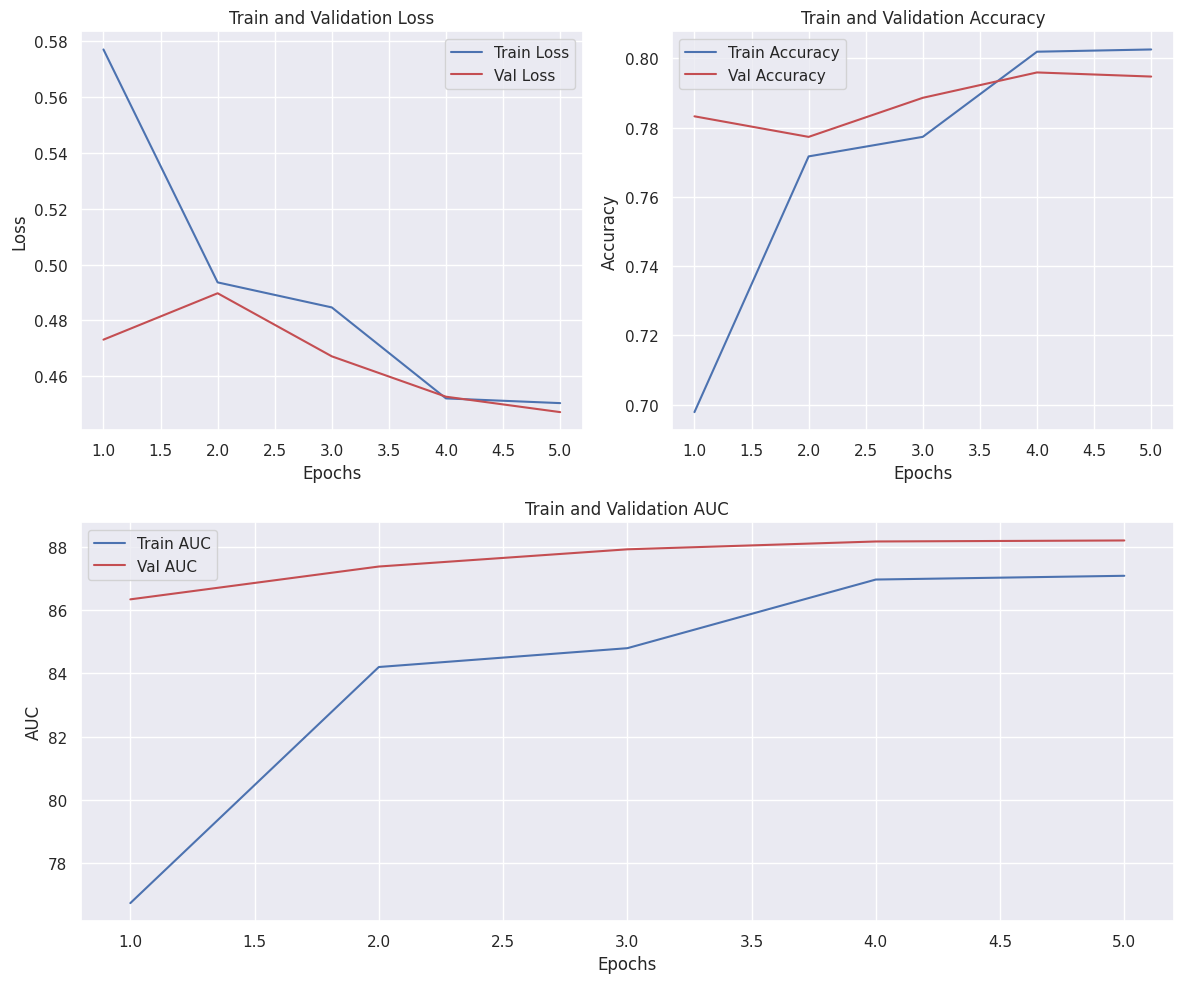

In [15]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [16]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "encoder": "angle",
        "angle_rot": "Y",
        "entangler": "strong",
        "imprimitive": "Y",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 7,249 trainable parameters


Epoch   5/5: 100%|██████████| 313/313 [08:25<00:00,  1.61s/batch, Epoch = 8m 25s, Loss = 0.4541|0.4627, Acc = 0.801|0.791, AUC = 86.877|87.764]

TOTAL TIME = 2176.91s
BEST ACC = 0.79% AT EPOCH 5
BEST AUC = 87.76 AT EPOCH 5


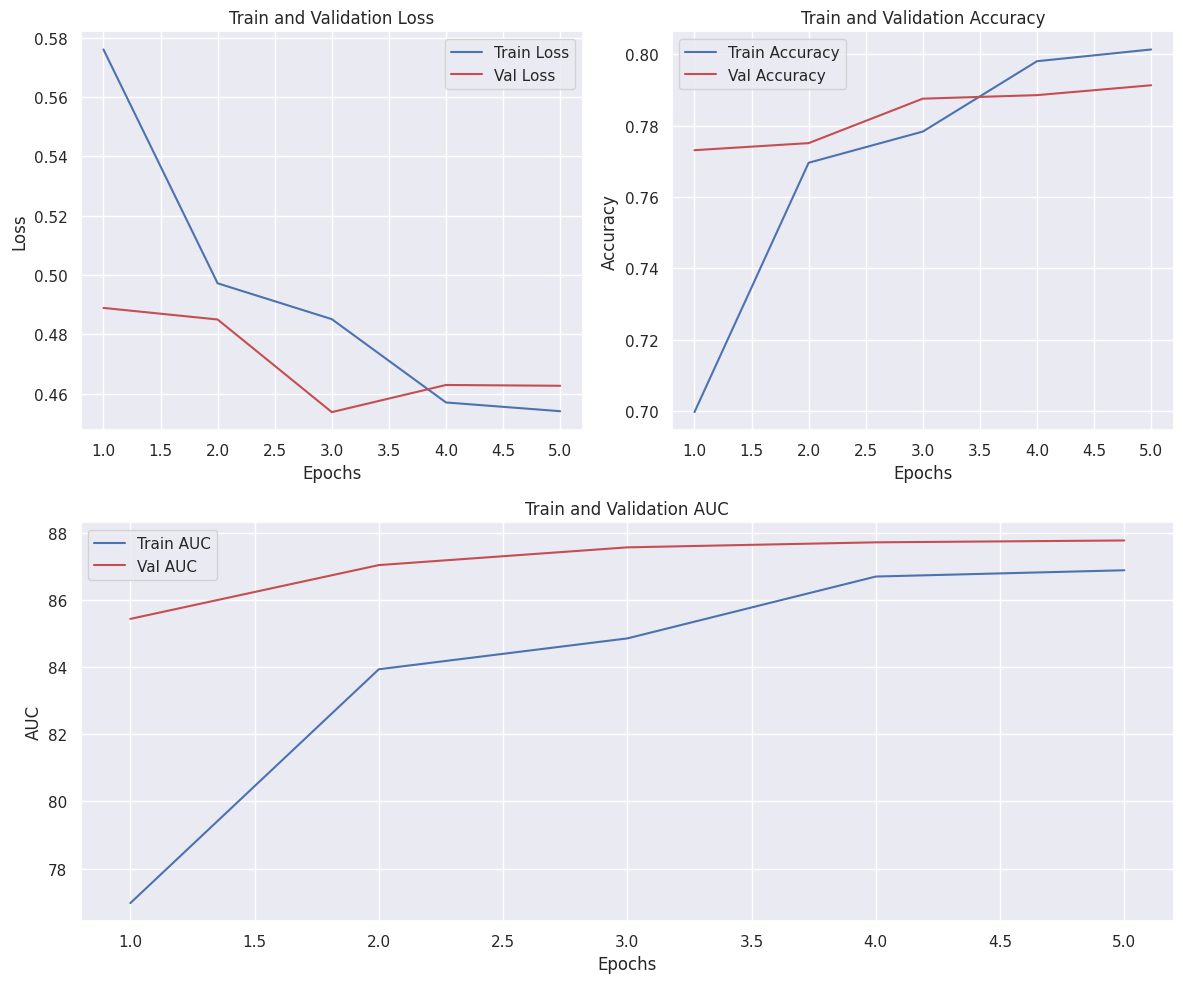

In [17]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [18]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "strong",
        "imprimitive": "Y",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 7,249 trainable parameters


Epoch   5/5: 100%|██████████| 313/313 [10:32<00:00,  2.02s/batch, Epoch = 10m 32s, Loss = 0.4675|0.4685, Acc = 0.791|0.783, AUC = 85.966|87.367]

TOTAL TIME = 3099.89s
BEST ACC = 0.79% AT EPOCH 4
BEST AUC = 87.37 AT EPOCH 5


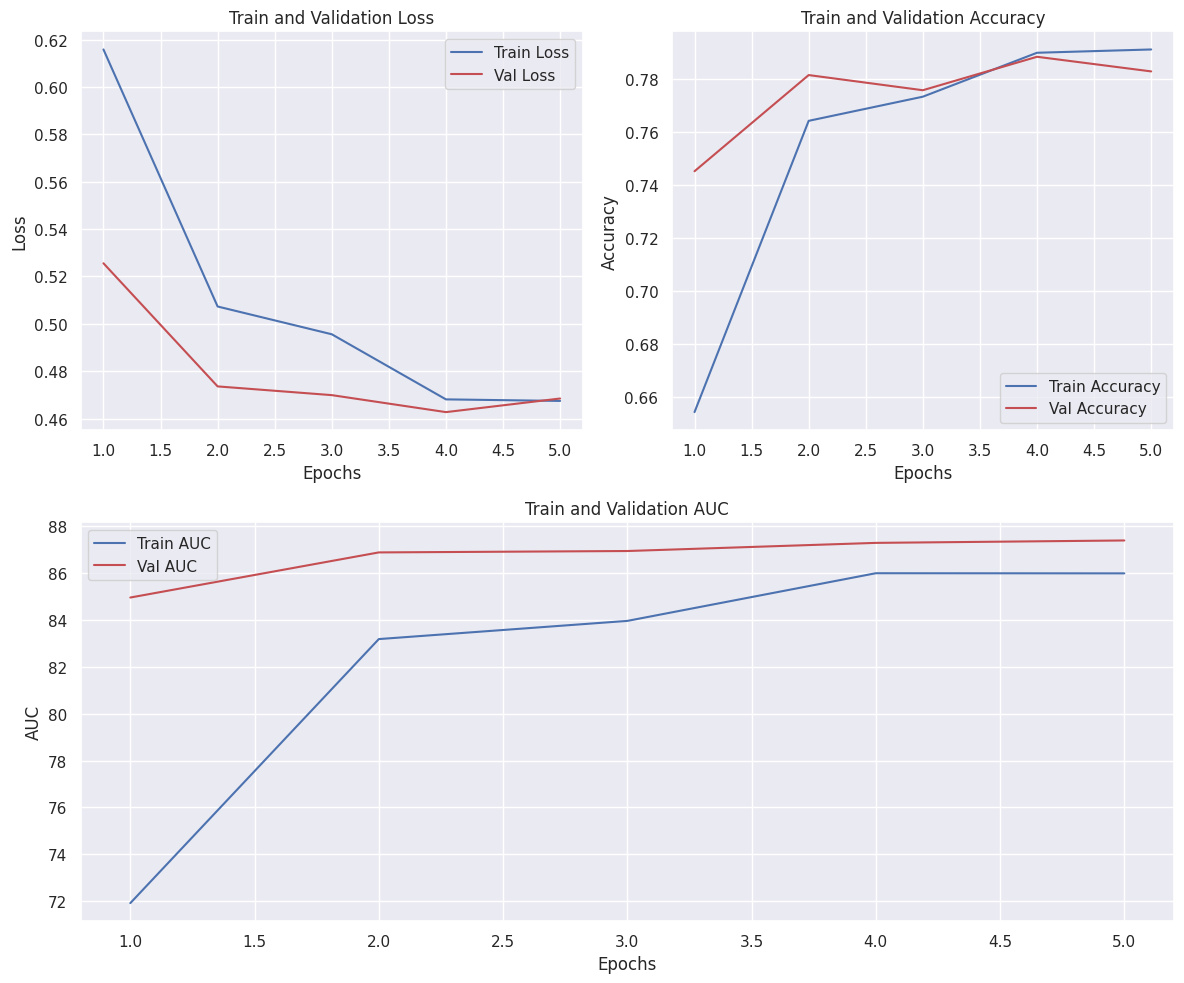

In [19]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [20]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "encoder": "angle",
        "angle_rot": "X",
        "entangler": "strong",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 7,249 trainable parameters


Epoch   5/5: 100%|██████████| 313/313 [13:37<00:00,  2.61s/batch, Epoch = 13m 37s, Loss = 0.4300|0.4347, Acc = 0.813|0.807, AUC = 88.363|89.556]

TOTAL TIME = 4822.16s
BEST ACC = 0.81% AT EPOCH 4
BEST AUC = 89.56 AT EPOCH 5


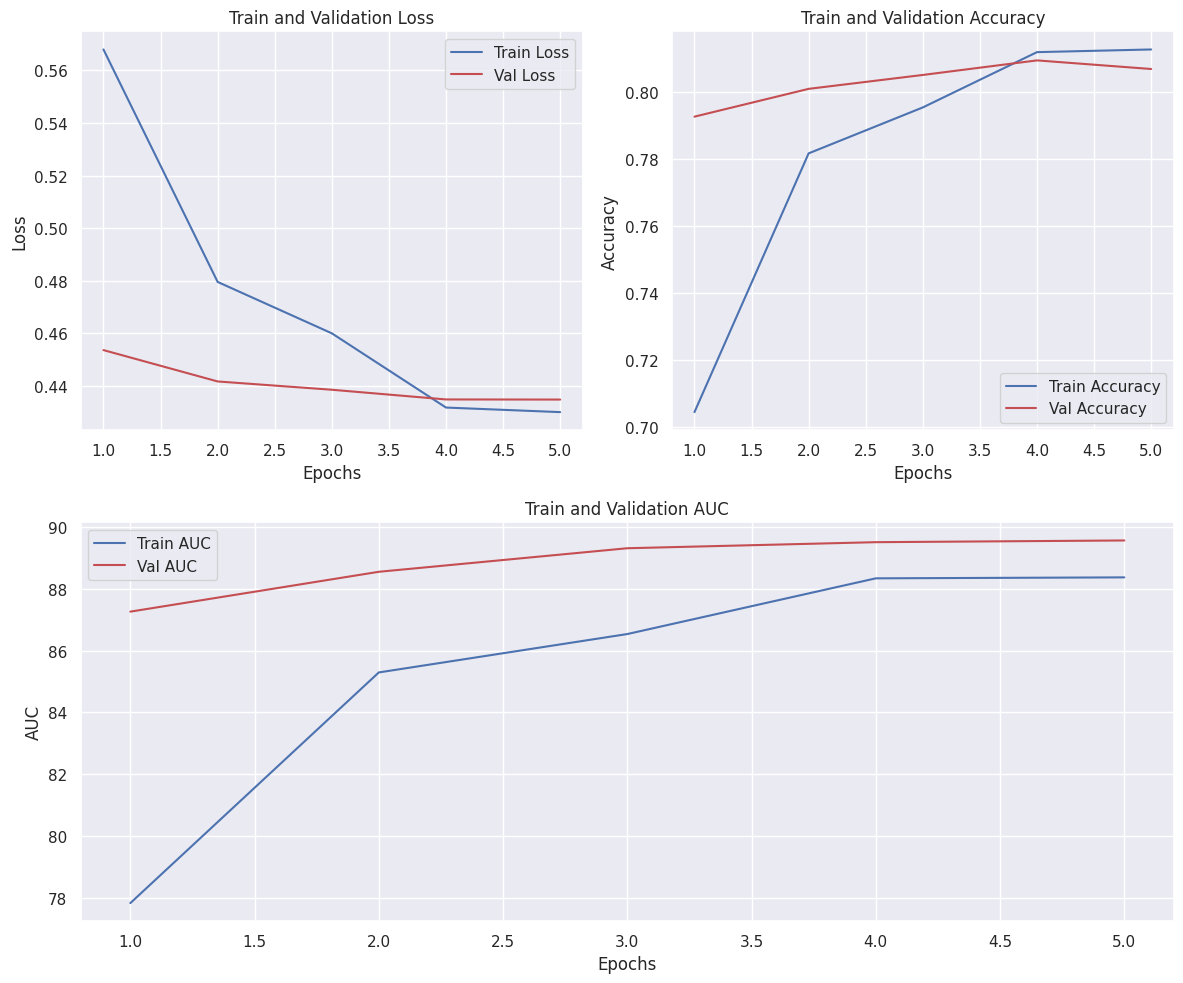

In [21]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [22]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "encoder": "angle",
        "angle_rot": "Y",
        "entangler": "strong",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 7,249 trainable parameters


Epoch   5/5: 100%|██████████| 313/313 [16:25<00:00,  3.15s/batch, Epoch = 16m 25s, Loss = 0.4330|0.4277, Acc = 0.812|0.806, AUC = 88.214|89.484]

TOTAL TIME = 4593.04s
BEST ACC = 0.81% AT EPOCH 5
BEST AUC = 89.48 AT EPOCH 5


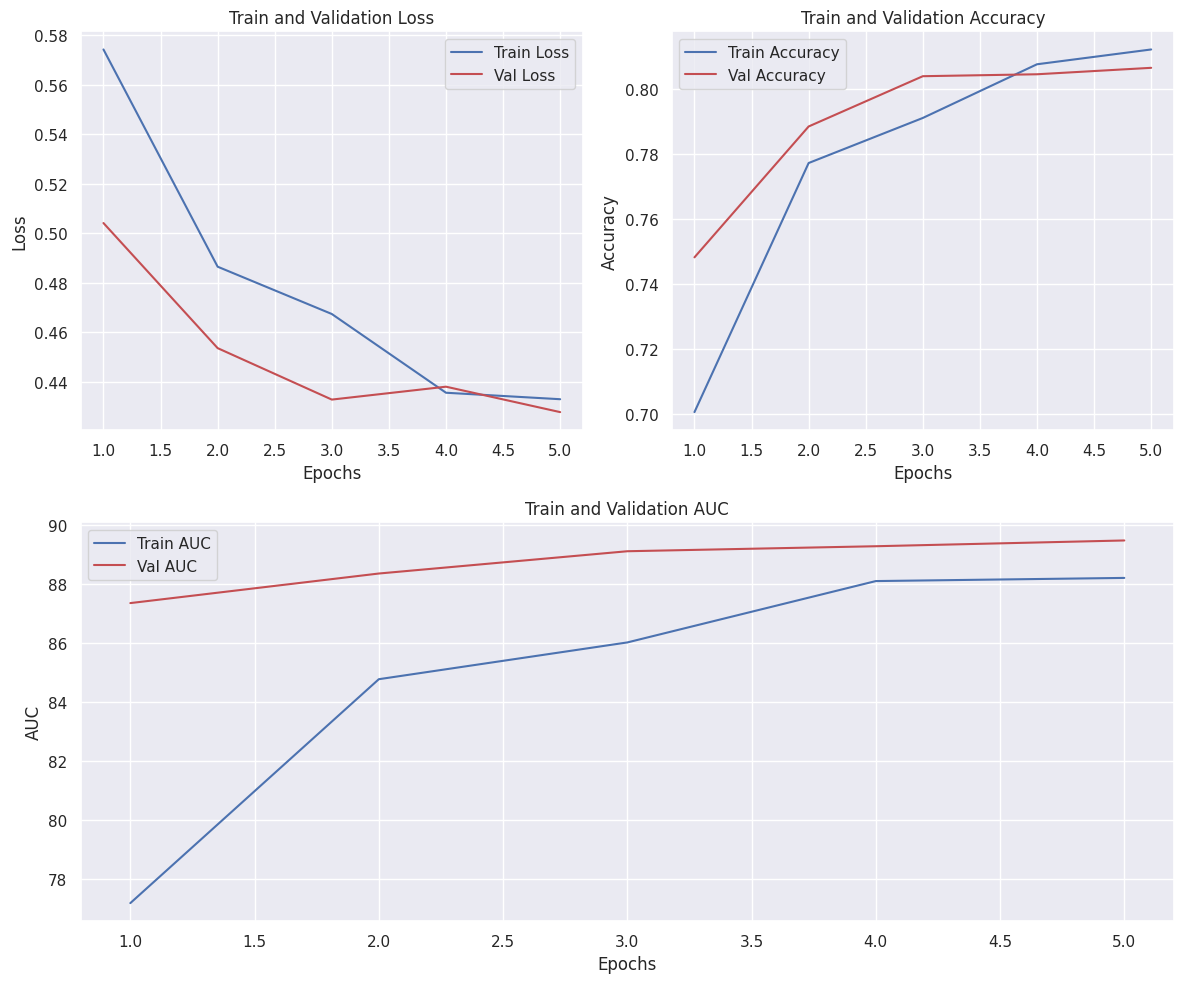

In [23]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [24]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=False,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={
        "encoder": "angle",
        "angle_rot": "Z",
        "entangler": "strong",
        "imprimitive": "Z",
    },
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 7,249 trainable parameters


Epoch   5/5: 100%|██████████| 313/313 [15:37<00:00,  2.99s/batch, Epoch = 15m 37s, Loss = 0.4616|0.4733, Acc = 0.796|0.786, AUC = 86.461|87.265]

TOTAL TIME = 4685.85s
BEST ACC = 0.79% AT EPOCH 5
BEST AUC = 87.27 AT EPOCH 5


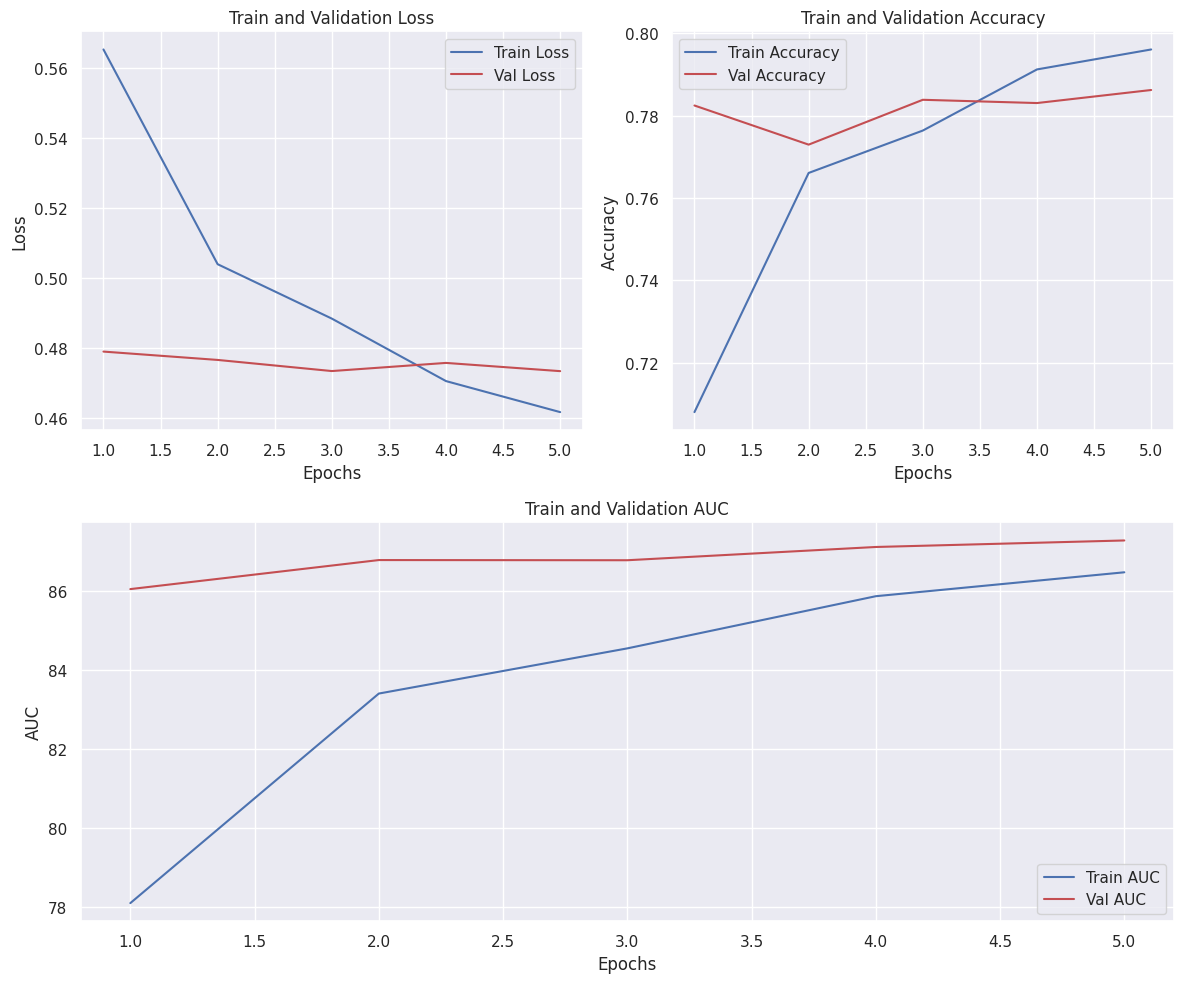

In [25]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)